# 의자, 피아노, 랩탑으로 학습하여 테스트

> 각 영상의 최대 높이 : 300, 최대 너비 : 300  

---
## 영상 중심이동 변환 테스트

In [1]:
import cv2
import glob
import numpy as np

In [2]:
# 영상의 크기는 300 * 300, 이보다 작은 영상은 센터로 이동
def centerImage(src, dx, dy):
    mtrx = np.float32([[1,0,dx],[0,1,dy]])
    return cv2.warpAffine(src, mtrx, (300, 300))

In [3]:
# 피아노 영상 그레이스케일 변환 및 중심이동
i = 0
for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

    saveFile = "../Data/cnn/piano300/image_%04d.jpg"%i 
    img2 = centerImage(
        img,
        np.floor((300-img.shape[1])/2),
        np.floor((300-img.shape[0])/2)
    )
    i += 1
    cv2.imwrite(saveFile, img2)

In [4]:
# 의자 영상 그레이스케일 변환 및 중심이동, 60개만 적용
i = 0
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

    saveFile = "../Data/cnn/chair300/image_%04d.jpg"%i 
    img2 = centerImage(
        img,
        np.floor((300-img.shape[1])/2),
        np.floor((300-img.shape[0])/2)
    )
    i += 1
    cv2.imwrite(saveFile, img2)

    if i >= 60:
        break

In [5]:
# 랩탑 영상 그레이스케일 변환 및 중심이동, 60개만 적용
i = 0
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

    saveFile = "../Data/cnn/laptop300/image_%04d.jpg"%i 
    img2 = centerImage(
        img,
        np.floor((300-img.shape[1])/2),
        np.floor((300-img.shape[0])/2)
    )
    i += 1
    cv2.imwrite(saveFile, img2)

    if i >= 60:
        break

---
## 각 영상을 그레이스케일 변환 및 중심이동하여 numpy로 저장

In [6]:
number_of_data = 60
img_width = 300
img_height = 300

In [7]:
# chair 영상 그레이스케일 변환 및 중심이동하여 numpy로 저장
chairData = np.zeros(number_of_data * img_height * img_width).reshape(number_of_data, img_height, img_width)

In [8]:
i = 0
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = centerImage(img,np.round((300-img.shape[1])/2),np.round((300-img.shape[0])/2))
    chairData[i,:,:] = img
    i += 1

    if i >= 60:
        break

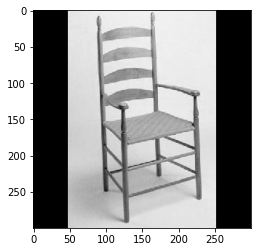

In [9]:
import matplotlib.pyplot as plt
plt.imshow(chairData[11].reshape(300, 300), cmap='gray')
plt.show()

In [10]:
# piano 영상을 그레이스케일로 변환 및 중심이동하여 numpy로 저장
pianoData = np.zeros(number_of_data * img_height * img_width).reshape(number_of_data, img_height, img_width)

In [11]:
i = 0
for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = centerImage(img,np.round((300-img.shape[1])/2),np.round((300-img.shape[0])/2))
    pianoData[i,:,:] = img
    i += 1

    if i >= 60:
        break

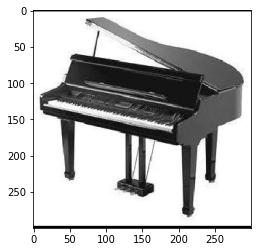

In [12]:
plt.imshow(pianoData[11].reshape(300, 300), cmap='gray')
plt.show()

In [13]:
# laptop 영상을 그레이스케일로 변환 및 중심이동하여 numpy로 저장
laptopData = np.zeros(number_of_data * img_height * img_width).reshape(number_of_data, img_height, img_width)

In [14]:
i = 0
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = centerImage(img,np.round((300-img.shape[1])/2),np.round((300-img.shape[0])/2))
    laptopData[i,:,:] = img
    i += 1

    if i >= 60:
        break

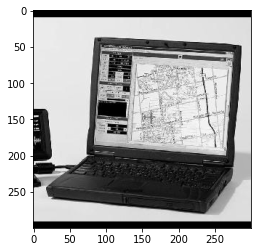

In [15]:
plt.imshow(laptopData[11].reshape(300, 300), cmap='gray')
plt.show()

---
### numpy 데이터를 train data로 합치기

In [16]:
trainData = np.concatenate([chairData, laptopData, pianoData])
trainData.shape

(180, 300, 300)

In [17]:
# target data 만들기
trainTarget = np.concatenate([np.zeros(60), np.ones(60), np.full(60, 2)]) # concatenate를 사용하여 target형태 생성
trainTarget

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# 데이터 만들기
trainData = trainData.reshape(-1, img_height, img_width, 1) / 255.0
trainTarget.shape

(180,)

In [20]:
# train, test 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(
    trainData, trainTarget, test_size=0.2, random_state=42
)

In [21]:
# train, valid 데이터 분할
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [22]:
# 데이터 복제??
train_input = np.concatenate([train_input, train_input])
train_target = np.concatenate([train_target, train_target])

In [23]:
# 데이터 갯수 확인
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)
print(val_input.shape)
print(val_target.shape)

(230, 300, 300, 1)
(230,)
(36, 300, 300, 1)
(36,)
(29, 300, 300, 1)
(29,)


---
### 신경망 만들기

In [24]:
from tensorflow import keras

In [25]:
model = keras.Sequential()

In [26]:
model.add(
    keras.layers.Conv2D(
        50, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
        input_shape = (img_height, img_width, 1)
    )
)

In [27]:
model.add(keras.layers.MaxPooling2D(2))

In [28]:
model.add(
    keras.layers.Conv2D(
        100,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
)

In [29]:
model.add(keras.layers.MaxPooling2D(2))

In [30]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.6))  # 50% Drop Out
#model.add(keras.layers.Dense(200, activation='relu'))
#model.add(keras.layers.Dropout(0.5))  # 50% Drop Out
model.add(keras.layers.Dense(3, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 50)      500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 50)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 100)     45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 562500)            0         
                                                                 
 dense (Dense)               (None, 100)               5

In [32]:
# 모델 학습하기
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics ='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_cnn_model_3.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_input, 
    train_target, 
    epochs=20, 
    validation_data=[val_input, val_target],
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20


2022-07-22 11:01:21.621825: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 7s 801ms/step - loss: 5.5142 - accuracy: 0.4130 - val_loss: 0.9541 - val_accuracy: 0.5172
Epoch 2/20
8/8 [==============================] - 6s 782ms/step - loss: 0.7048 - accuracy: 0.6826 - val_loss: 0.7465 - val_accuracy: 0.7586
Epoch 3/20
8/8 [==============================] - 6s 783ms/step - loss: 0.3715 - accuracy: 0.8478 - val_loss: 0.8121 - val_accuracy: 0.6897
Epoch 4/20
8/8 [==============================] - 6s 783ms/step - loss: 0.1943 - accuracy: 0.9304 - val_loss: 1.0392 - val_accuracy: 0.5517
Epoch 5/20
8/8 [==============================] - 6s 781ms/step - loss: 0.0978 - accuracy: 0.9696 - val_loss: 0.8590 - val_accuracy: 0.6897
Epoch 6/20
8/8 [==============================] - 6s 774ms/step - loss: 0.0407 - accuracy: 0.9913 - val_loss: 0.7530 - val_accuracy: 0.7931
Epoch 7/20
8/8 [==============================] - 6s 780ms/step - loss: 0.0229 - accuracy: 0.9957 - val_loss: 1.0663 - val_accuracy: 0.7241


In [33]:
model.evaluate(test_input, test_target)

2/2 [==============================] - 0s 38ms/step - loss: 0.9251 - accuracy: 0.7222


[0.9251452684402466, 0.7222222089767456]